   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


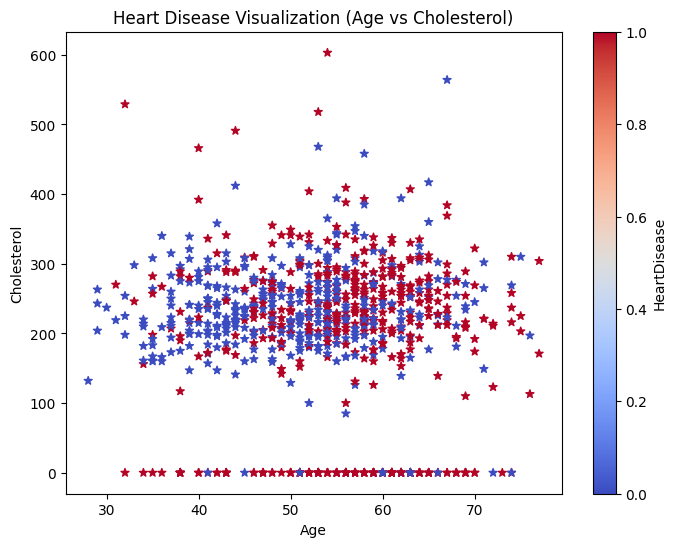

Actual value: 0
Predicted value: 1
Accuracy=  0.7161716171617162
F1_Score= 0.7137400462219754


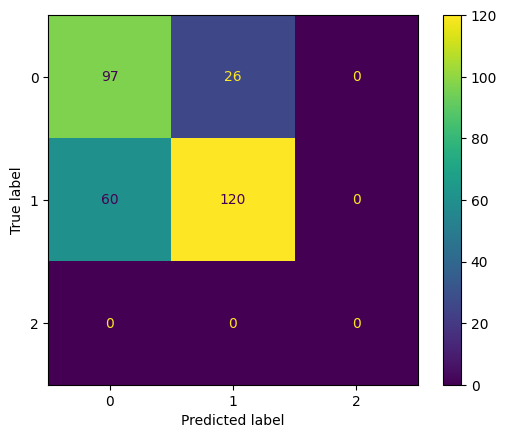

In [1]:
import pandas as pd

df = pd.read_csv("heart.csv")


print(df.head())

df.info

import matplotlib.pyplot as plt

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']:
    df[col] = label_encoder.fit_transform(df[col])


X = df[['Age', 'Cholesterol']].values     # for example, pick two columns to plot
y = df['HeartDisease'].values


plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', marker='*')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Heart Disease Visualization (Age vs Cholesterol)')
plt.colorbar(label='HeartDisease')
plt.show()


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.33,random_state=125)

from sklearn.naive_bayes import GaussianNB

model=GaussianNB()
model.fit(X_train,y_train)
predicted=model.predict([X_test[6]])

print("Actual value:",y_test[6])
print("Predicted value:",predicted[0])


from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

y_pred=model.predict(X_test)
accuracy=accuracy_score(y_pred,y_test)
f1=f1_score(y_pred,y_test,average='weighted')

print('Accuracy= ',accuracy)
print('F1_Score=',f1)

labels=[0,1,2]
cm=confusion_matrix(y_test,y_pred,labels=labels)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot();